# Chapter 11: Disease spreading

<img src="DS_fig_01.png" alt="title" width="600px" />

## Motivation

**SIR Model**: model to describe the spreading of a disease.

Used in epidemiology; helps in estimating / predicting the course of an epidemic. Used in strategic planning.


## Agent-based Models for disease spreading

Useful for: 

- the planning in real scenarios
- developing disease containment strategies 
- optimization of limited resources
- mitigate the impact of an epidemic on the economy 


## Application example: Improving epidemic testing and containment strategies using machine learning

[Improving epidemic testing and containment strategies using machine learning](https://iopscience.iop.org/article/10.1088/2632-2153/abf0f7)

<img src="DS_fig_02.jpg" alt="title" width="600px" />

## SIR Agent-based model

<img src="DS_fig_03.png" alt="title" width="600px" />

Square lattice $L \times L$, with $N$ agents.

Each turn, the agents can move with diffusion probability $d$ of one step horizontally of vertically. Agents cannot move diagonally.

Each cell can host an unlimited number of agents.

Each agent has three possible states: 
- S: susceptible
- I: infected / infectious
- R: recovered

In the base SIR model, a recovered agent can't get infected and get the disease twice.

Contagion (spread of the disease) happens among agents occupying the same cell.

$\beta$ : probability that, in a cell, each infected agent infects each susceptible agent. 

$\gamma$ : probability that, each turn, each infected agent recovers. 

The initial condition is set with:

$$
S(0) = S_0\,\,\,\,\,\,\,\,\,\, 
I(0) = I_0\,\,\,\,\,\,\,\,\,\, 
R(0) = 0
$$

## Simulation of Agent-based SIR

In the simulation, we indicate with:

<b style="color:DodgerBlue;">blue</b> dot : a susceptible agent

<b style="color:Tomato;">red</b> dot : an infected / infectious agent

<b style="color:MediumSeaGreen;">green</b> dot : a recovered agent

If more agents are on the same cell, the color appearing in the cell is the one of the last agent moving to the cell.

We use *periodic boundary conditions*. 

Agents are positioned randomly at the beginning.

### Diffusion, disease spreading, recovery

Implement a function performing the diffusion step, the infection step, and the recovery step happening in one turn for a population of agents.

The status of each agent is coded as follows:
- 0: represents S
- 1: represents I
- 2: represents R



In [1]:
import numpy as np 
    
def diffuse_spread_recover(x, y, status, d, beta, gamma, L):
    """
    Function performing the diffusion step, the infection step, and the 
    recovery step happening in one turn for a population of agents.
    
    Parameters
    ==========
    x, y : Agents' positions.
    status : Agents' status.
    d : Diffusion probability.
    beta : Infection probability.
    gamma : Recovery probability.
    L : Side of the square lattice.
    """
    
    N = np.size(x)
    
    # Diffusion step.
    diffuse = np.random.rand(N)
    move = np.random.randint(4, size=N)
    for i in range(N):
        if diffuse[i] < d:
            if move[i] == 0:
                x[i] = x[i] - 1
            elif move[i] == 1:
                y[i] = y[i] - 1
            elif move[i] == 2:
                x[i] = x[i] + 1
            else: 
                # move[i] == 3
                y[i] = y[i] + 1
                
    # Enforce pbc.
    x = x % L
    y = y % L

    # Spreading disease step.
    infected = np.where(status == 1)[0]
    
    for i in infected:
        # Check whether other particles share the same position.
        same_x = np.where(x == x[i])
        same_y = np.where(y == y[i])
        same_cell = np.intersect1d(same_x, same_y)
        for j in same_cell:
            if status[j] == 0:
                if np.random.rand() < beta:
                    status[j] = 1
        
    # Recover step.
    for i in infected:
        # Check whether the infected recovers.
        if np.random.rand() < gamma:
            status[i] = 2
    
    return x, y, status


### Simulation

Initialize the system

In [2]:
N_part = 1000  # Total agent population.
d = 0.8  # Diffusion probability.
beta = 0.6  # Infection spreading probability.
gamma = 0.01  # Recovery probability.
L = 100  # Side of the lattice.

I0 = 10  # Initial number of infected agents.

# Initialize agents position.
x = np.random.randint(L, size=N_part)
y = np.random.randint(L, size=N_part)

# Initialize agents status.
status = np.zeros(N_part)
status[0:I0] = 1


Let's run the simulation (visualization every time step)

In [4]:
import time
from tkinter import *

N_skip = 1  # Visualize status every N_skip steps. 
ra = 0.5  # Radius of the circle representing the agents.

window_size = 600

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window.
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)


step = 0

S = []  # Keeps track of the susceptible agents.
I = []  # Keeps track of the infectious agents.
R = []  # Keeps track of the recovered agents.
S.append(N_part - I0)
I.append(I0)
R.append(0)


def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running:

    x, y, status = diffuse_spread_recover(x, y, status, d, beta, gamma, L)  
    
    S.append(np.size(np.where(status == 0)[0]))
    I.append(np.size(np.where(status == 1)[0]))
    R.append(np.size(np.where(status == 2)[0]))
    
    # Update animation frame.
    if step % N_skip == 0:   
        canvas.delete('all')
        agents = []
        for j in range(N_part):
            agent_color = '#1f77b4' if status[j] == 0 \
                else '#d62728' if status[j] == 1 else '#2ca02c'
            agents.append(
                canvas.create_oval(
                    (x[j] - ra) / L * window_size,
                    (y[j] - ra) / L * window_size,
                    (x[j] + ra) / L * window_size,
                    (y[j] + ra) / L * window_size,
                    outline='', 
                    fill=agent_color,
                )
            )
        
        tk.title(f'Iteration {step}')
        tk.update_idletasks()
        tk.update()
        time.sleep(0.1)  # Increase to slow down the simulation.

    step += 1
    if I[-1] == 0: 
        running = False

tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).

Let's plot S, I, R versus time.

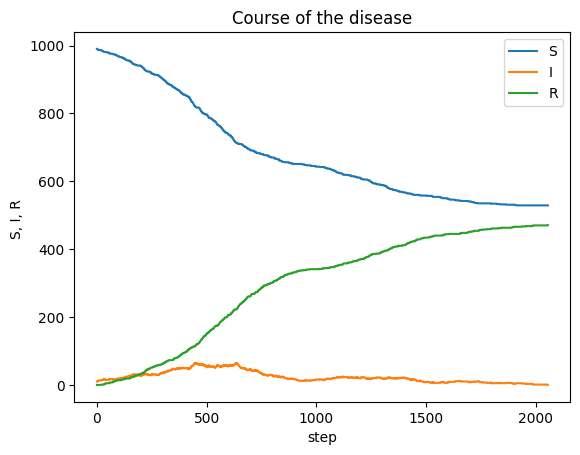

In [6]:
from matplotlib import pyplot as plt

t = np.array(np.arange(len(S)))
S_agents = np.array(S) 
I_agents = np.array(I) 
R_agents = np.array(R) 


plt.plot(t, S_agents, '-', label='S')
plt.plot(t, I_agents, '-', label='I')
plt.plot(t, R_agents, '-', label='R')
plt.legend()
plt.title('Course of the disease')
plt.xlabel('step')
plt.ylabel('S, I, R ')
plt.show()

Let's run the code without visualization. 

We can try the effect of diffent:

- $\beta$ : probability that, in a cell, each infected agent infects each susceptible agent.

- $\gamma$ : probability that, each turn, each infected agent recovers.


Done.


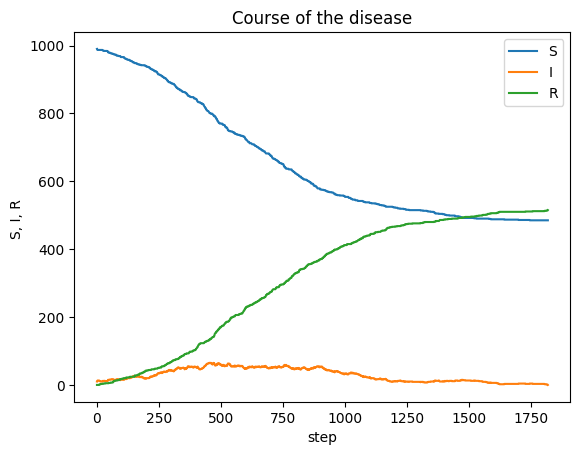

In [7]:
N_part = 1000  # Total agent population.
d = 0.8  # Diffusion probability.
beta = 0.2  # Infection spreading probability.
gamma = 0.01  # Recovery probability.
L = 100  # Side of the lattice.

I0 = 10  # Initial number of infected agents.

# Initialize agents position.
x = np.random.randint(L, size=N_part)
y = np.random.randint(L, size=N_part)

# Initialize agents status.
status = np.zeros(N_part)
status[0:I0] = 1

step = 0

S = []  # Keeps track of the susceptible agents.
I = []  # Keeps track of the infectious agents.
R = []  # Keeps track of the recovered agents.
S.append(N_part - I0)
I.append(I0)
R.append(0)

running = True  # Flag to control the loop.
while running:

    x, y, status = diffuse_spread_recover(x, y, status, d, beta, gamma, L)  
    
    S.append(np.size(np.where(status == 0)[0]))
    I.append(np.size(np.where(status == 1)[0]))
    R.append(np.size(np.where(status == 2)[0]))
    
    step += 1
    if I[-1] == 0: 
        running = False
        
print('Done.')



t = np.array(np.arange(len(S)))
S_agents = np.array(S) 
I_agents = np.array(I) 
R_agents = np.array(R) 


plt.plot(t, S_agents, '-', label='S')
plt.plot(t, I_agents, '-', label='I')
plt.plot(t, R_agents, '-', label='R')
plt.legend()
plt.title('Course of the disease')
plt.xlabel('step')
plt.ylabel('S, I, R ')
plt.show()

### Final number of recovered agents

$R_{\infty}$ : final number of recovered agents.

In the **SIR model based on ODE** (ordinary differentials equations) $R_{\infty}$ depends on the ratio $\beta/\gamma$ only.

Let's try to check whether for the **Agent-based SIR model** this is also the case.

In [8]:
N_part = 1000  # Total agent population.
d = 0.8  # Diffusion probability.
beta_list = np.arange(11) / 10  # Infection spreading probability.
gamma_list = [0.01, 0.02]  # Recovery probability.
L = 100  # Side of the lattice.
repetitions = 3  # Average over repetitions different runs.

I0 = 10  # Initial number of infected agents.

R_infinite = np.zeros([np.size(gamma_list), np.size(beta_list)])
R_std = np.zeros([np.size(gamma_list), np.size(beta_list)])

R_final = np.zeros(repetitions)

for i in range(np.size(gamma_list)):
    gamma = gamma_list[i]
    print(f'Simulations with gamma = {gamma:.3f}.')
    for j in range(np.size(beta_list)):
        beta = beta_list[j]
        print(f'   - Simulations with beta = {beta:.3f}.')
        # Initialize agents position.
        x = np.random.randint(L, size=N_part)
        y = np.random.randint(L, size=N_part)

        for k in range(repetitions):
            # Initialize agents status.
            status = np.zeros(N_part)
            status[0:I0] = 1
    
            running = True  # Flag to control the loop.
            while running:
                x, y, status = diffuse_spread_recover(x, y, status, d, 
                                                      beta, gamma, L)  
                I = np.size(np.where(status == 1)[0])
                if I == 0: 
                    running = False
            R_final[k] = np.size(np.where(status == 2)[0])
            
        R_infinite[i, j] = np.mean(R_final)
        R_std[i, j] = np.std(R_final)

print('Done.')




Simulations with gamma = 0.010.
   - Simulations with beta = 0.000.
   - Simulations with beta = 0.100.
   - Simulations with beta = 0.200.
   - Simulations with beta = 0.300.
   - Simulations with beta = 0.400.
   - Simulations with beta = 0.500.
   - Simulations with beta = 0.600.
   - Simulations with beta = 0.700.
   - Simulations with beta = 0.800.
   - Simulations with beta = 0.900.
   - Simulations with beta = 1.000.
Simulations with gamma = 0.020.
   - Simulations with beta = 0.000.
   - Simulations with beta = 0.100.
   - Simulations with beta = 0.200.
   - Simulations with beta = 0.300.
   - Simulations with beta = 0.400.
   - Simulations with beta = 0.500.
   - Simulations with beta = 0.600.
   - Simulations with beta = 0.700.
   - Simulations with beta = 0.800.
   - Simulations with beta = 0.900.
   - Simulations with beta = 1.000.
Done.


Let's plot the results.

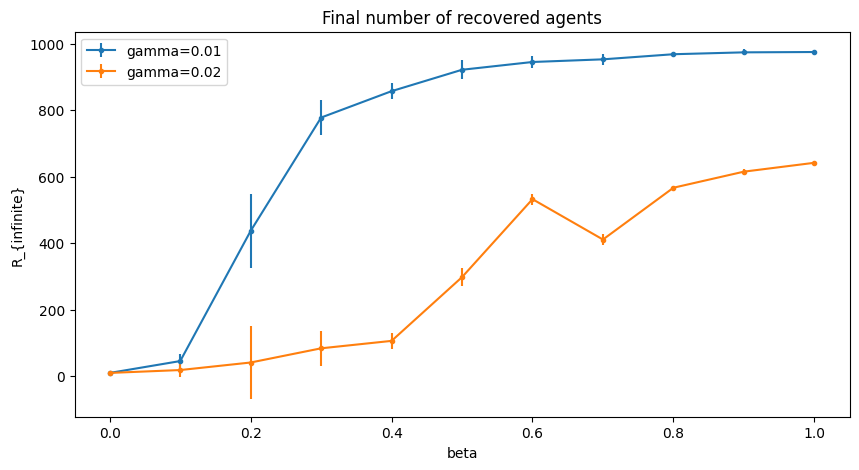

In [10]:

plt.figure(figsize=(10, 5))
plt.errorbar(beta_list, R_infinite[0, :], R_std[0, :], fmt='.-', 
             label='gamma='+str(gamma_list[0]))
plt.errorbar(beta_list, R_infinite[1, :], R_std[0, :], fmt='.-', 
             label='gamma='+str(gamma_list[1]))
plt.legend()
plt.title('Final number of recovered agents')
plt.xlabel('beta')
plt.ylabel('R_{infinite}')
plt.show()